BFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


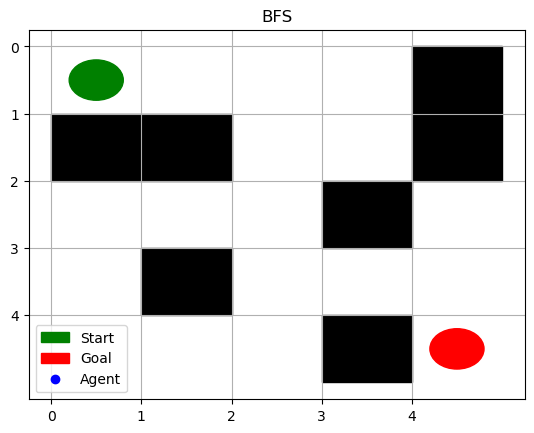

DFS Path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


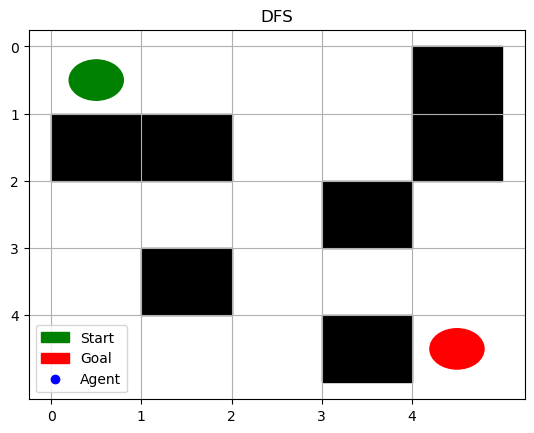

UCS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


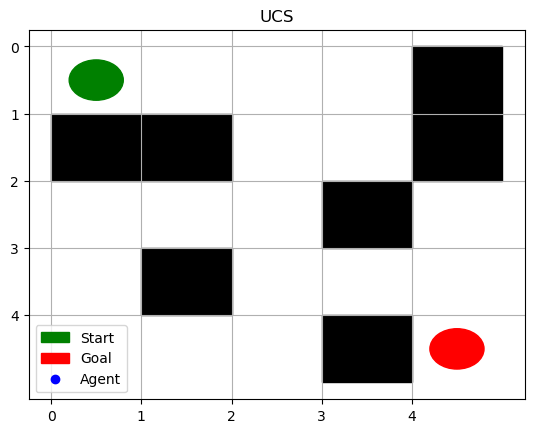

A* Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


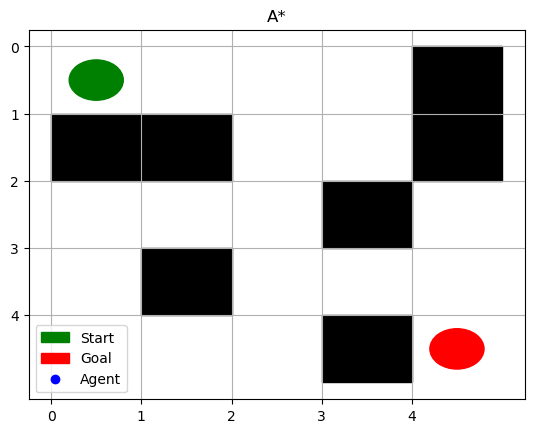

IDS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


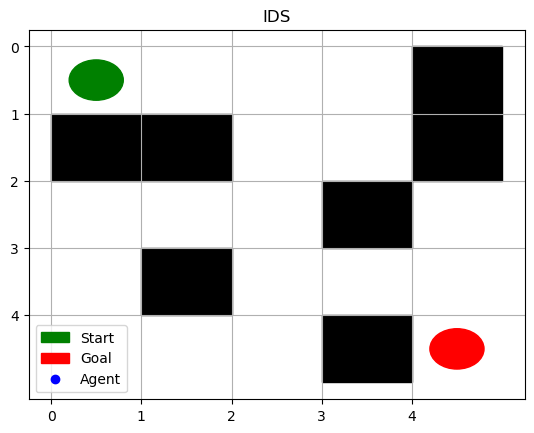

In [1]:
"""
Project Title: Maze Pathfinding using Search Algorithms

Instructor: Eng. Omar 

Student Name: Eman Ali
Student Name: Mohamed Salah 
Student Name: Shahenda Farag 
Student Name: Habiba Tamir
Student Name: Esraa Yehia

Description:
This project implements and compares several search algorithms
(BFS, DFS, UCS, IDS,and A*) to solve the Maze
Pathfinding problem. The performance of each algorithm is evaluated
based on execution time, number of nodes explored, and solution length.

"""

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
import heapq

# =======================
# Maze Definition
# =======================

maze = [
    [0, 0, 0, 0, 1],
    [1, 1, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)   # 🟢 Start
goal = (4, 4)    # 🔴 Goal

ROWS = len(maze)
COLS = len(maze[0])

animations = []   # important for animation


# =======================
# Successor Function
# =======================

def get_neighbors(pos):
    x, y = pos
    moves = [(x-1,y), (x+1,y), (x,y-1), (x,y+1)]
    return [
        (nx, ny) for nx, ny in moves
        if 0 <= nx < ROWS and 0 <= ny < COLS and maze[nx][ny] == 0
    ]



# Heuristic

def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


# BFS
# Habiba Tamer Gamal Elmowafy

def bfs():
    queue = deque([(start, [start])])
    visited = set()

    while queue:
        current, path = queue.popleft()

        if current == goal:
            return path

        if current in visited:
            continue

        visited.add(current)

        for n in get_neighbors(current):
            queue.append((n, path + [n]))

    return None


# DFS
# Shahenda Farag Zaki Hanafia

def dfs():
    stack = [(start, [start])]
    visited = set()

    while stack:
        current, path = stack.pop()

        if current == goal:
            return path

        if current in visited:
            continue

        visited.add(current)

        for n in get_neighbors(current):
            stack.append((n, path + [n]))

    return None


# UCS
# Eman Ali Ragab Kotb

def ucs():
    pq = [(0, start, [start])]
    visited = {}

    while pq:
        cost, current, path = heapq.heappop(pq)

        if current == goal:
            return path

        if current in visited and visited[current] <= cost:
            continue

        visited[current] = cost

        for n in get_neighbors(current):
            heapq.heappush(pq, (cost + 1, n, path + [n]))

    return None



# A*
# Mohamed Salah Shehata Elwany

def astar():
    pq = [(0, start, [start])]
    visited = {}

    while pq:
        f, current, path = heapq.heappop(pq)
        g = len(path) - 1

        if current == goal:
            return path

        if current in visited and visited[current] <= g:
            continue

        visited[current] = g

        for n in get_neighbors(current):
            h = manhattan(n, goal)
            heapq.heappush(pq, (g + 1 + h, n, path + [n]))

    return None


# IDS (Iterative Deepening Search)
# Esraa Yehia Mohamed Husieni

def dls(node, depth, path, visited):
    if node == goal:
        return path

    if depth == 0:
        return None

    visited.add(node)

    for n in get_neighbors(node):
        if n not in visited:
            result = dls(n, depth - 1, path + [n], visited.copy())
            if result is not None:
                return result

    return None

def ids(max_depth=50):
    for depth in range(max_depth):
        path = dls(start, depth, [start], set())
        if path is not None:
            return path
    return None



# Animation

def animate_path(path, title):
    fig, ax = plt.subplots()
    ax.set_title(title)

    ax.set_xticks(range(COLS))
    ax.set_yticks(range(ROWS))
    ax.grid(True)

    # Walls
    for i in range(ROWS):
        for j in range(COLS):
            if maze[i][j] == 1:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, color='black'))

    # Start & Goal
    ax.add_patch(plt.Circle(
        (start[1]+0.5, start[0]+0.5), 0.3, color='green', label='Start'
    ))
    ax.add_patch(plt.Circle(
        (goal[1]+0.5, goal[0]+0.5), 0.3, color='red', label='Goal'
    ))

    agent, = ax.plot([], [], 'bo', label='Agent')
    ax.legend()

    def update(frame):
        x, y = path[frame]
        agent.set_data(y+0.5, x+0.5)
        return agent,

    anim = animation.FuncAnimation(
        fig, update, frames=len(path),
        interval=400, repeat=False
    )

    animations.append(anim)
    plt.gca().invert_yaxis()
    plt.show()


# Main


if __name__ == "__main__":

    algorithms = {
        "BFS": bfs,
        "DFS": dfs,
        "UCS": ucs,
        "A*": astar,
        "IDS": ids
    }

    for name, algo in algorithms.items():
        path = algo()
        print(f"{name} Path:", path)

        if path:
            animate_path(path, name)
